In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('molecule_parameters.csv')

In [3]:
df.head(2)

,complex-name,gb-complex-etot,gb-complex-1-4-eel,gb-complex-eelec,gb-complex-egb,gb-complex-esurf,gb-protein-etot,gb-protein-1-4-eel,gb-protein-eelect,gb-protein-egb,...,pb-protein-epb,pb-protein-ecavity,pb-ligand-etot,pb-ligand-vdwaals,pb-ligand-eelec,pb-ligand-epb,pb-ligand-ecavity,ddg,enthalpy-gb,entropy
0,10gs,-16145.9190,18478.8142,-31052.1742,-3659.4630,86.9041,-16042.9095,18034.9833,-30493.1722,-3672.7126,...,-3650.6491,87.9920,-565.1881,-10.1928,-416.8647,-141.8681,3.7375,-8.841927,-42.916,-34.07407324
1,1a1e,-9777.1684,7030.7012,-13515.0036,-3349.3791,56.5130,-9499.3955,7189.5223,-13366.9577,-3378.1703,...,-3333.0961,56.2103,-173.5190,-11.4008,-96.6715,-69.9064,4.4598,-8.289306,3.2581,11.54740633


<AxesSubplot:xlabel='ddg', ylabel='Frequency'>

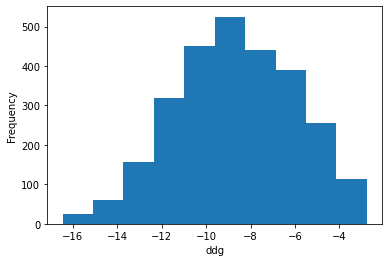

In [3]:
# DDG distribution for entire dataset of ~3000 datapoints
import matplotlib.pyplot as plt
plt.xlabel('ddg')
df['ddg'].plot.hist()

In [44]:
from os import listdir
from os.path import isfile, join
mypath = 'dataset234/'
onlyfiles = [f for f in listdir(mypath) if f not in ('.DS_Store') and f in (df['complex-name'].tolist())]

In [73]:
df_234= pd.DataFrame()
ddg_list = []
for i in onlyfiles:
    ddg_list.append(float(df[df['complex-name']==i]['ddg']))

In [74]:
ddg_list[0]

-12.01949419

In [75]:
df_234 = pd.DataFrame({'ddg': ddg_list}) 

In [76]:
df_234.head(2)

,ddg
0,-12.019494
1,-8.634694


<AxesSubplot:ylabel='Frequency'>

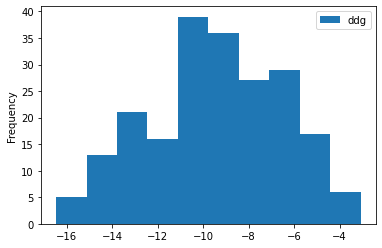

In [79]:
# DDG distribution for dataset of ~200 datapoints
import matplotlib.pyplot as plt
# plt.xlabel('ddg')
df_234.plot.hist('ddg')

In [14]:
from os import listdir
from os.path import isfile, join
mypath = '500/'
onlyfiles = [f for f in listdir(mypath) if f not in ('.DS_Store') and f in (df['complex-name'].tolist())]

In [15]:
df_500= pd.DataFrame()
ddg_list_500 = []
for i in onlyfiles:
    ddg_list_500.append(float(df[df['complex-name']==i]['ddg']))
df_500 = pd.DataFrame({'ddg': ddg_list_500}) 

<AxesSubplot:ylabel='Frequency'>

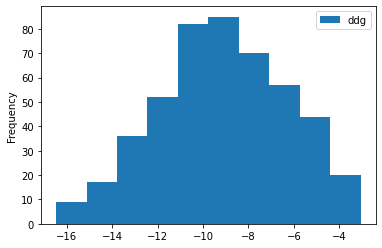

In [16]:
# DDG distribution for dataset of ~500 datapoints
import matplotlib.pyplot as plt
# plt.xlabel('ddg')
df_500.plot.hist('ddg')

In [145]:
len(df_500)

502

In [4]:
df['entropy'] = pd.to_numeric(df['entropy'], errors='coerce')
df['enthalpy-gb'] = pd.to_numeric(df['enthalpy-gb'],errors='coerce')

In [158]:
df.dtypes

complex-name           object
gb-complex-etot       float64
gb-complex-1-4-eel    float64
gb-complex-eelec      float64
gb-complex-egb        float64
gb-complex-esurf      float64
gb-protein-etot       float64
gb-protein-1-4-eel    float64
gb-protein-eelect     float64
gb-protein-egb        float64
gb-protein-esurf      float64
gb-ligand-etot        float64
gb-ligand-1-4-eel     float64
gb-ligand-eelec       float64
gb-ligand-egb         float64
gb-ligand-esurf       float64
pb-complex-etot       float64
pb-complex-vdwaals    float64
pb-complex-eelect     float64
pb-complex-epb        float64
pb-complex-ecavity    float64
pb-protein-etot       float64
pb-protein-vdwaals    float64
pb-protein-eelec      float64
pb-protein-epb        float64
pb-protein-ecavity    float64
pb-ligand-etot        float64
pb-ligand-vdwaals     float64
pb-ligand-eelec       float64
pb-ligand-epb         float64
pb-ligand-ecavity     float64
ddg                   float64
enthalpy-gb           float64
entropy   

# Correlation on entire PDBBIND dataset

<AxesSubplot:>

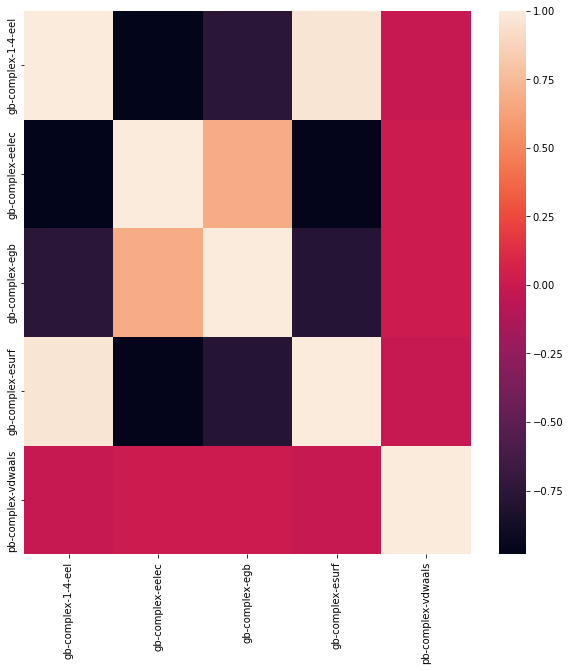

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 10))
corr = df[['entropy','gb-complex-1-4-eel','gb-complex-eelec','gb-complex-egb','gb-complex-esurf','pb-complex-vdwaals']].corr()
sns.heatmap(corr)

In [13]:
df[df['ddg']>-6]

,complex-name,gb-complex-etot,gb-complex-1-4-eel,gb-complex-eelec,gb-complex-egb,gb-complex-esurf,gb-protein-etot,gb-protein-1-4-eel,gb-protein-eelect,gb-protein-egb,...,pb-protein-epb,pb-protein-ecavity,pb-ligand-etot,pb-ligand-vdwaals,pb-ligand-eelec,pb-ligand-epb,pb-ligand-ecavity,ddg,enthalpy-gb,entropy
2,1a30,-6925.5462,9349.4510,-14111.7670,-2211.3839,48.1538,-6881.3365,8949.8465,-13675.6929,-2204.7807,...,-2179.8309,49.2906,-645.4443,-9.3186,-381.1129,-257.9893,2.9765,-5.940670,148.3394,154.280069
17,1ai4,-29424.1346,31958.3474,-55211.1125,-6311.2026,139.8330,-29322.8972,31982.8136,-55173.8530,-6272.2149,...,-6195.4217,140.3571,-90.7714,-1.1552,-1.3713,-89.9548,1.7099,-3.453878,-10.9636,-7.509722
18,1ai5,-29384.3549,32056.8006,-55340.0035,-6240.7194,139.5674,-29305.5370,32072.8366,-55306.7977,-6211.6576,...,-6125.1667,140.0817,-66.8763,-0.8763,10.4660,-78.2770,1.8110,-5.139370,-23.0420,-17.902630
19,1ai7,-29280.0852,31997.2394,-55160.6492,-6255.8975,139.2221,-29265.3379,32022.0453,-55168.0693,-6258.7753,...,-6170.1682,139.4613,-1.0452,-0.2417,9.2827,-11.3836,1.2975,-5.650544,-9.3781,-3.727556
21,1aj7,-14683.4881,20251.3474,-31114.2868,-3917.2396,96.6909,-14451.6597,20462.2675,-30979.2015,-4031.9231,...,-4058.4773,97.1974,-49.9266,-2.4516,52.8709,-102.9990,2.6532,-5.346603,-11.2800,-5.933397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,4up5,-3136.6144,3736.2232,-5311.7304,-1586.7837,25.6765,-3075.4131,3797.0503,-5296.9411,-1601.3672,...,-1592.1636,25.8450,-13.4585,-0.2503,-1.1052,-13.9264,1.8234,-3.592033,-9.6515,-6.059467
2894,4whs,-53414.4373,48666.7373,-91434.3718,-10895.9559,249.1530,-53390.6811,48653.8818,-91400.6849,-10893.2289,...,-10826.9494,249.3508,-46.7916,-0.3817,-31.8938,-15.9075,1.3914,-5.691990,-6.7685,-1.076510
2904,5yas,-8357.2566,14206.5518,-19810.3718,-2803.9835,50.5468,-8428.0794,14074.9258,-19737.7077,-2816.1167,...,-2779.7329,50.8192,-76.7557,0.7095,-62.3775,-16.4502,1.3626,-4.503856,1.0761,5.579956
2906,6rnt,-3972.7102,4827.6161,-7038.4884,-1789.2302,27.3924,-3569.8574,5158.9312,-6935.3943,-1820.7675,...,-1826.9428,27.3732,-92.9492,-5.5782,-23.5081,-66.4732,2.6104,-3.274276,-9.9774,-6.703124
